## Определение перспективного тарифа для телеком-компании

### Описание проекта

«Мегалайн» — федерального оператора сотовой связи. Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.

Нам предстоит сделать предварительный анализ тарифов на небольшой выборке клиентов. В нашем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

Описание тарифов

**Тариф «Смарт»**

- Ежемесячная плата: 550 рублей
- Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
- Стоимость услуг сверх тарифного пакета: 1. минута разговора: 3 рубля («Мегалайн» всегда округляет вверх значения минут и мегабайтов. Если пользователь проговорил всего 1 секунду, в тарифе засчитывается целая минута); 2. сообщение: 3 рубля; 3. 1 Гб интернет-трафика: 200 рублей.

**Тариф «Ультра»**

- Ежемесячная плата: 1950 рублей
- Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
- Стоимость услуг сверх тарифного пакета: 1. минута разговора: 1 рубль; 2. сообщение: 1 рубль; 3. 1 Гб интернет-трафика: 150 рублей.

**Примечание:**
«Мегалайн» всегда округляет секунды до минут, а мегабайты — до гигабайт. Каждый звонок округляется отдельно: даже если он длился всего 1 секунду, будет засчитан как 1 минута.
Для веб-трафика отдельные сессии не считаются. Вместо этого общая сумма за месяц округляется в бо́льшую сторону. Если абонент использует 1025 мегабайт в этом месяце, с него возьмут плату за 2 гигабайта.

#### Описание данных

**Таблица users (информация о пользователях):**
* `user_id` — уникальный идентификатор пользователя
* `first_name` — имя пользователя
* `last_name` — фамилия пользователя
* `age` — возраст пользователя (годы)
* `reg_date` — дата подключения тарифа (день, месяц, год)
* `churn_date` — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент 
выгрузки данных)
* `city` — город проживания пользователя
* `tarif` — название тарифного плана

**Таблица calls (информация о звонках):**

* `id` — уникальный номер звонка
* `call_date` — дата звонка
* `duration` — длительность звонка в минутах
* `user_id` — идентификатор пользователя, сделавшего звонок

**Таблица messages (информация о сообщениях):**

* `id` — уникальный номер сообщения
* `message_date` — дата сообщения
* `user_id` — идентификатор пользователя, отправившего сообщение

**Таблица internet (информация об интернет-сессиях):**

* `id` — уникальный номер сессии
* `mb_used` — объём потраченного за сессию интернет-трафика (в мегабайтах)
* `session_date` — дата интернет-сессии
* `user_id` — идентификатор пользователя

**Таблица tariffs (информация о тарифах):**

* `tariff_name` — название тарифа
* `rub_monthly_fee` — ежемесячная абонентская плата в рублях
* `minutes_included` — количество минут разговора в месяц, включённых в абонентскую плату
*  `messages_included` — количество сообщений в месяц, включённых в абонентскую плату
* `mb_per_month_included` — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
* `rub_per_minute` — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)
* `rub_per_message` — стоимость отправки сообщения сверх тарифного пакета
* `rub_per_gb` — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)

## Оглавление

- [1 Изучение данных из файла](#1)
  - [1.1 Вывод](#1.1)
- [2 Предобработка данных](#2)
  - [2.1 Подготовка данных](#2.1)
  - [2.2 Подготовка пользовательских данных](#2.2)
  - [2.3 Вывод](#2.3)
- [3 Анализ и описание данных](#3)
  - [3.1 Вывод](#3.1)
- [4 Проверка гипотез и пояснения](#4)
  - [4.1 Вывод](#4.1)
- [5 Общий вывод](#5)
- [6 Чек-лист готовности](#6)

## Шаг 1 Изучение данных из файла 
<a id='1'></a>

In [1]:
#импортируем библиотеки
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import datetime as dt
from scipy import stats as st

In [2]:
#прочитаем файлы и сохраним их в отдельные датафреймы
calls = pd.read_csv('~/datasets/calls.csv')
internet = pd.read_csv('~/datasets/internet.csv')
messages = pd.read_csv('~/datasets/messages.csv')
tariffs = pd.read_csv('~/datasets/tariffs.csv')
users = pd.read_csv('~/datasets/users.csv')

----
### Таблица calls (информация о звонках):

* `id` — уникальный номер звонка
* `call_date` — дата звонка
* `duration` — длительность звонка в минутах
* `user_id` — идентификатор пользователя, сделавшего звонок

In [3]:
#посмотрим первые 5 строк таблицы calls
calls.head()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


In [4]:
#посмотрим общую информацию 
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


----
### Таблица internet (информация об интернет-сессиях):

* `id` — уникальный номер сессии
* `mb_used` — объём потраченного за сессию интернет-трафика (в мегабайтах)
* `session_date` — дата интернет-сессии
* `user_id` — идентификатор пользователя

In [5]:
#посмотрим первые 5 строк таблицы internet 
internet.head()

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


In [6]:
#посмотрим общую информацию 
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


----
### Таблица messages (информация о сообщениях):

* `id` — уникальный номер сообщения
* `message_date` — дата сообщения
* `user_id` — идентификатор пользователя, отправившего сообщение

In [7]:
#посмотрим первые 5 строк таблицы messages
messages.head()

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


In [8]:
#посмотрим общую информацию 
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


In [9]:
#проверим первую и последние даты для того, чтобы убедиться, что вошли данные только за 2018 год 
calls['call_date'].min(), calls['call_date'].max()

('2018-01-01', '2018-12-31')

In [10]:
internet['session_date'].min(), internet['session_date'].max()

('2018-01-01', '2018-12-31')

In [11]:
messages['message_date'].min(), messages['message_date'].max()

('2018-01-02', '2018-12-31')

----
### Таблица tariffs (информация о тарифах):

* `tariff_name` — название тарифа
* `rub_monthly_fee` — ежемесячная абонентская плата в рублях
* `minutes_included` — количество минут разговора в месяц, включённых в абонентскую плату
*  `messages_included` — количество сообщений в месяц, включённых в абонентскую плату
* `mb_per_month_included` — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
* `rub_per_minute` — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)
* `rub_per_message` — стоимость отправки сообщения сверх тарифного пакета
* `rub_per_gb` — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)

In [12]:
#посмотрим файл с информацией о тарифах
tariffs.head()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


----
### Таблица users (информация о пользователях):
* `user_id` — уникальный идентификатор пользователя
* `first_name` — имя пользователя
* `last_name` — фамилия пользователя
* `age` — возраст пользователя (годы)
* `reg_date` — дата подключения тарифа (день, месяц, год)
* `churn_date` — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент 
выгрузки данных)
* `city` — город проживания пользователя
* `tarif` — название тарифного плана

In [13]:
#посмотрим первые 5 строк таблицы users
users.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


In [14]:
#посмотрим выборку
users.pivot_table(index='tariff', values='user_id', aggfunc='count')

,user_id
tariff,
smart,351
ultra,149


In [15]:
#посмотрим общую информацию 
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


В столбце `churn_date` есть пропущенные строки, означающие, что тариф ещё действовал на момент выгрузки данных. Заполнять данными их не будем. Оставим как есть.

In [16]:
#проверим явные дубликаты по всем файлам
calls.duplicated().sum(), internet.duplicated().sum(), messages.duplicated().sum(), users.duplicated().sum()

(0, 0, 0, 0)

### Вывод
<a id='1.1'></a>

Предварительно можно утверждать, что данных достаточно для проверки гипотез. Данные чистые пропуски заполнять нет необходимости. Для дальнейшего анализа необходимо изменить тип данных в столбцах с датами в `datetime`, а также привести к нужным единицам измерения.

## Шаг 2 Предобработка данных
<a id='2'></a>

В примечаниях говорится, что «Мегалайн» всегда округляет секунды до минут, а мегабайты — до гигабайт. Каждый звонок округляется отдельно: даже если он длился всего 1 секунду, будет засчитан как 1 минута. Для веб-трафика отдельные сессии не считаются. Вместо этого общая сумма за месяц округляется в бо́льшую сторону. Если абонент использует 1025 мегабайт в этом месяце, с него возьмут плату за 2 гигабайта.

Исходя из этого:
- данные в столбце с датами приведем в нужный формат, затем выделим месяц
- минуты округлим до целых за каждую сессию
- мегабайты просуммируем по месяцам для каждого абонента, затем округлим до гигабайт

### Шаг 2.1 Изучение данных из файла 
<a id='2.1'></a>

In [17]:
#изменим тип данных и округлим продолжительность звонков до целых минут
calls['call_date']=pd.to_datetime(calls['call_date'], format = '%Y-%m-%d')
calls['calls_month']= calls['call_date'].dt.month
calls['duration'] = calls['duration'].apply(np.ceil)
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   id           202607 non-null  object        
 1   call_date    202607 non-null  datetime64[ns]
 2   duration     202607 non-null  float64       
 3   user_id      202607 non-null  int64         
 4   calls_month  202607 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 7.7+ MB


In [18]:
#изменим тип данных в формат datetime64
messages['message_date']= pd.to_datetime(messages['message_date'], format= '%Y-%m-%d')
messages['message_month']= messages['message_date'].dt.month
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 4 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   id             123036 non-null  object        
 1   message_date   123036 non-null  datetime64[ns]
 2   user_id        123036 non-null  int64         
 3   message_month  123036 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 3.8+ MB


In [19]:
#изменим тип данных в формат datetime64
internet['session_date']=pd.to_datetime(internet['session_date'], format = '%Y-%m-%d')
internet['session_month']= internet['session_date'].dt.month
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Unnamed: 0     149396 non-null  int64         
 1   id             149396 non-null  object        
 2   mb_used        149396 non-null  float64       
 3   session_date   149396 non-null  datetime64[ns]
 4   user_id        149396 non-null  int64         
 5   session_month  149396 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(1)
memory usage: 6.8+ MB


### Шаг 2.2 Подготовка пользовательских данных 
<a id='2.2'></a>

Посчитаем для каждого пользователя: 
- количество сделанных звонков и израсходованных минут разговора по месяцам;
- количество отправленных сообщений по месяцам;
- объем израсходованного интернет-трафика по месяцам;
- помесячная выручка с каждого пользователя 

Посчитаем для каждого пользователя: количество сделанных звонков и израсходованных минут разговора по месяцам

In [20]:
#посчитаем количество сделанных звонков: сгруппируем по месяцам и user_id, посчитаем количество звонков
calls.groupby(['user_id','calls_month'])['id'].count().reset_index().sort_values(by='id', ascending=False).head()

,user_id,calls_month,id
2972,1467,12,244
2359,1377,3,203
1359,1216,12,198
1400,1222,10,196
1243,1196,12,189


In [21]:
#сгруппируем данные в таблице calls по месяцу и user_id, просуммируем длительность 
calls_grouped = calls.groupby(['user_id','calls_month'])['duration'].sum().reset_index()
calls_grouped.columns = ['user_id','month','total_duration']
calls_grouped.sort_values(by='total_duration', ascending=False).head()

,user_id,month,total_duration
2972,1467,12,1673.0
2359,1377,3,1609.0
1359,1216,12,1435.0
1237,1196,6,1410.0
2366,1377,10,1401.0


In [22]:
users.query('user_id == 1467')

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
467,1467,66,NaN,Киров,Исак,Александрюк,2018-11-24,ultra


Больше всего проговорил абонент с `user_id` 1467  Исак	Александрюк из города Киров, целых 1673.0 минуты, для этого он совершил 244 звонка за декабрь.  Он подключился к тарифному плану **ultra** 24 ноября 2018 года. И даже он не смог выговорить 3000 минут, входящих в пакет.

Как видно за год никому не удалось выговорить минуты по тарифному плану **ultra**.

___
Посчитаем для каждого пользователя: количество отправленных сообщений по месяцам

In [23]:
#сгруппируем данные в файле messages по месяцам и user_id, просуммируем по месяцам для дальнейшего объединения
messages_grouped= messages.groupby(['user_id', 'message_month'])['id'].count().reset_index()
messages_grouped.columns= ['user_id','month', 'total_msg']
messages_grouped.sort_values(by='total_msg', ascending=False).head()

,user_id,month,total_msg
866,1165,12,224
154,1028,10,223
1197,1231,7,211
1196,1231,6,201
865,1165,11,197


In [24]:
users.query('user_id == 1165')

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
165,1165,19,NaN,Самара,Алексей,Медведев,2018-10-14,ultra


Абонент 1165 - Алексей Медведев отправил больше всех сообщений в декабре 2018 года. 224 сообщения были отправлены из города Самара. 
В пакет тарифа `ultra` входит 1000 сообщений. 224 - это меее 25%. 

Посчитаем для каждого пользователя: объем израсходованного интернет-трафика по месяцам.

In [25]:
#сгруппируем данные в файле internet по месяцам и user_id, просуммируем по месяцам для дальнейшего объединения
internet_grouped = internet.groupby(['user_id', 'session_month'])['mb_used'].sum().reset_index()
internet_grouped.columns = ['user_id','month', 'gb_used']

#конвертируем мб в гб, и округлим до целых по каждому user_id по месяцам
mb_per_gb=1024
internet_grouped['gb_used']= (internet_grouped['gb_used']/mb_per_gb).apply(np.ceil)
internet_grouped.sort_values(by='gb_used', ascending=False).head(10)

,user_id,month,gb_used
799,1124,10,49.0
1524,1240,8,48.0
1622,1255,7,45.0
1901,1300,11,44.0
383,1060,12,43.0
159,1024,11,43.0
2413,1380,12,43.0
1528,1240,12,43.0
1521,1240,5,43.0
1164,1180,10,43.0


In [26]:
users.query('user_id == 1124')

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
124,1124,54,NaN,Махачкала,Альбин,Андрианов,2018-09-24,ultra


Житель города Махачкала - Альбин Андрианов израсходовал максимальное количество интернета за месяц - 49, а это на 19 гб больше, чем входит в пакет тарифа `ultra`. 30 гб интернета, это много или мало? Нам предстоит выяснить, сколько в среднем используют интернет трафика абоненты двух тарифных планов.

In [27]:
#из файла users выделим только нужные столбцы для дальнейшего анализа 'user_id', 'city', 'tariff'
new_data = users[['user_id', 'city', 'tariff']]
new_data.head()

,user_id,city,tariff
0,1000,Краснодар,ultra
1,1001,Москва,smart
2,1002,Стерлитамак,smart
3,1003,Москва,ultra
4,1004,Новокузнецк,ultra


In [28]:
#объединим наши файлы в один при помощи merge, используем метод outer, 
#чтобы ничего не потерять и заменим на 0, возникающие значения NaN
df3 = pd.merge(messages_grouped,internet_grouped, on=["user_id","month"], how='outer').fillna(0)
df4 = pd.merge(df3, calls_grouped, on=["user_id", "month"], how='outer').fillna(0)
data_merged = pd.merge(new_data, df4, on=["user_id"], how='outer').fillna(0)
data_merged.head()

,user_id,city,tariff,month,total_msg,gb_used,total_duration
0,1000,Краснодар,ultra,5.0,22.0,3.0,159.0
1,1000,Краснодар,ultra,6.0,60.0,23.0,172.0
2,1000,Краснодар,ultra,7.0,75.0,14.0,340.0
3,1000,Краснодар,ultra,8.0,81.0,14.0,408.0
4,1000,Краснодар,ultra,9.0,57.0,15.0,466.0


In [29]:
#проверим, что все в порядке
data_merged.describe().T

,count,mean,std,min,25%,50%,75%,max
user_id,3216.0,1251.588930,144.645928,1000.0,1125.0,1253.0,1378.25,1499.0
month,3216.0,8.312189,2.911903,0.0,6.0,9.0,11.00,12.0
total_msg,3216.0,38.257463,36.149684,0.0,9.0,30.0,57.00,224.0
gb_used,3216.0,17.288246,7.410845,0.0,13.0,17.0,21.00,49.0
total_duration,3216.0,450.964241,242.096312,0.0,282.0,443.0,589.00,1673.0


In [30]:
#после слияния появился месяц 0, посмотрим что в нем
data_merged.query('user_id==1128 or user_id==1371')

,user_id,city,tariff,month,total_msg,gb_used,total_duration
827,1128,Волжский,ultra,0.0,0.0,0.0,0.0
2335,1371,Омск,smart,0.0,0.0,0.0,0.0


In [31]:
#посмотрим оригинальные данные по этим user_id
users.query('user_id==1128 or user_id==1371')

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
128,1128,51,2018-12-23,Волжский,Ксения,Агаева,2018-12-15,ultra
371,1371,50,2018-12-30,Омск,Ириней,Трофимов,2018-12-25,smart


Абоненты 1128 и 1371 подключились в декабре и фактически не пользовались пакетами, входящими в тарифный план. При слиянии эти абоненты добавились в общую таблицу, но так как в других таблицах по ним нет данных, то все остальные столбцы заполнились нулевыми значениями. По умолчанию абонентскую плату удерживается, даже если не использоваться услугами, поэтому не будем их исключать из общей таблицы, сменим месяц с 0 на 12.

In [32]:
data_merged.loc[(data_merged['user_id'] == 1128) | (data_merged['user_id'] == 1371),'month'] = 12
data_merged.query('user_id==1128 or user_id==1371')

,user_id,city,tariff,month,total_msg,gb_used,total_duration
827,1128,Волжский,ultra,12.0,0.0,0.0,0.0
2335,1371,Омск,smart,12.0,0.0,0.0,0.0


In [33]:
#преобразуем столбец 'month'и'tariff' в category при помощи astype, 
#остальные в int, при помощи try/except методом to_numeric

columns = ['total_msg', 'gb_used', 'total_duration', 'month']
for column in columns:
    try:
        data_merged[column] = pd.to_numeric(data_merged[column], downcast="integer")
    except:
        print(f'Не получается преобразовать {column} в int!')

data_merged['month'] = data_merged['month'].astype('category')
data_merged['tariff'] = data_merged['tariff'].astype('category')

data_merged.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3216 entries, 0 to 3215
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   user_id         3216 non-null   int64   
 1   city            3216 non-null   object  
 2   tariff          3216 non-null   category
 3   month           3216 non-null   category
 4   total_msg       3216 non-null   int16   
 5   gb_used         3216 non-null   int8    
 6   total_duration  3216 non-null   int16   
dtypes: category(2), int16(2), int64(1), int8(1), object(1)
memory usage: 97.9+ KB


Удалось преобразовать данные и уменьшить их размер на 51%.

Проверим, что итоговые суммы по столбцам `gb_used`,`total_duration` и `total_msg` не изменились после слияния.

In [34]:
data_merged['gb_used'].sum(), internet_grouped['gb_used'].sum()

(55599, 55599.0)

In [35]:
data_merged['total_duration'].sum(), calls_grouped['total_duration'].sum()

(1450301, 1450301.0)

In [36]:
data_merged['total_msg'].sum(), messages_grouped['total_msg'].sum()

(123036, 123036)

### Вывод
<a id='2.3'></a>

- Подготовили все данные для дальнейшего анализа, оставили только нужные данные, привели к целым числам там, где было нужно, изменили тип данных
- Посчитали для каждого пользователя: количество сделанных звонков и израсходованных минут разговора по месяцам. Выяснили, что за год никому не удалось выговорить минуты по тарифному плану `ultra`. Максимальное значение - 1673.0 минуты для тп 244 звонка. 
- Посчитали для каждого пользователя: количество отправленных сообщений по месяцам. Больше всех сообщений было отправлено в декабре 2018 года, всего 224 сообщения. В пакет тарифа `ultra` входит 1000 сообщений. 224 - это меее 25%.
- Посчитали для каждого пользователя: объем израсходованного интернет-трафика по месяцам. Рекородное количество за год - 49, это на 19 ГБ больше, чем входит в пакет тарифа `ultra`. 30 гб интернета, это много или мало? 
- Из файла users выделили только нужные столбцы для дальнейшего анализа `user_id`, `city`, `tariff`
- Объединили файлы в одну таблицу при помощи merge

## Шаг 3 Анализ и описание данных
<a id='3'></a>

Посчитаем для каждого пользователя: 
- помесячную выручку с каждого пользователя (вычтим бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика; остаток умножем на значение из тарифного плана; прибавим абонентскую плату, соответствующую тарифному плану)

In [37]:
tariffs.head()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [38]:
#создадим словарь с тарифами, чтобы брать значения из таблицы tariffs
tariff_dict = tariffs.to_dict()

#создаем функцию bill_total, которая будет считать истрачен ли лимит по тарифу и 
#суммировать значения сверх лимита
def bill_total(row):
    tariff_idx = 1 if row['tariff'] == 'ultra' else 0

    duration_diff = row['total_duration'] - tariff_dict['minutes_included'][tariff_idx]
    internet_diff = row['gb_used'] - (tariff_dict['mb_per_month_included'][tariff_idx]/1024)
    message_diff = row['total_msg'] - tariff_dict['messages_included'][tariff_idx]

    duration_calc = duration_diff * tariff_dict['rub_per_minute'][tariff_idx] if duration_diff>0 else 0
    internet_calc = internet_diff * tariff_dict['rub_per_gb'][tariff_idx] if internet_diff>0 else 0
    message_calc = message_diff * tariff_dict['rub_per_message'][tariff_idx] if message_diff>0 else 0
    
    return duration_calc + internet_calc + message_calc + tariff_dict['rub_monthly_fee'][tariff_idx]

#добавим новый столбец и применим функцию с помощью apply
data_merged['bill']=data_merged.apply(bill_total, axis=1)

#убедимся, что функция все считает корректно
data_merged.sort_values(by='bill', ascending=False).head(8)

,user_id,city,tariff,month,total_msg,gb_used,total_duration,bill
3143,1486,Нижний Новгород,smart,12,83,38,1007,6770.0
260,1042,Хабаровск,smart,12,75,37,728,5709.0
3142,1486,Нижний Новгород,smart,11,96,36,764,5680.0
1648,1261,Казань,smart,12,22,32,1074,5672.0
1819,1286,Москва,smart,12,68,35,739,5321.0
1017,1159,Красноярск,smart,12,2,35,734,5252.0
623,1098,Челябинск,smart,12,14,36,588,5014.0
799,1124,Махачкала,ultra,10,121,49,1225,4800.0


- Максимальная выручка составила - 6770 на тарифном плане `smart`. На тп `ultra` при таком же объеме трафика сумма выручки составила бы 3150 рублей, это меньше на 53%. 
- На тп `ultra` максимальная выручка составила 4800 рублей, при перерасходе интернет-трафика на 19 гб.

Опишем поведение клиентов, исходя из выборки. Сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц? 
- Посчитаем среднее количество, дисперсию и стандартное отклонение. 
- Построем гистограммы. 
- Опишем распределения.

In [39]:
#зададим переменные, в которых будут храниться срезы для тарифов ultra и smart
ultra_users = data_merged.loc[data_merged['tariff']=='ultra']
smart_users = data_merged.loc[data_merged['tariff']=='smart']

Посчитаем среднее количество минут, дисперсию и стандартное отклонение для длительности звонков

In [40]:
#посчитаем среднее количество, дисперсию и стандартное отклонение для продолжительности звонков
report_duration=data_merged.pivot_table(index = 'tariff', values = 'total_duration', aggfunc = ['var', 'std', 'mean']).round(0)
report_duration.columns=['duration_var','std','mean']
report_duration                  

,duration_var,std,mean
tariff,,,
smart,36281.0,190.0,418.0
ultra,101052.0,318.0,526.0


Построем гистограммы для длительности звонков

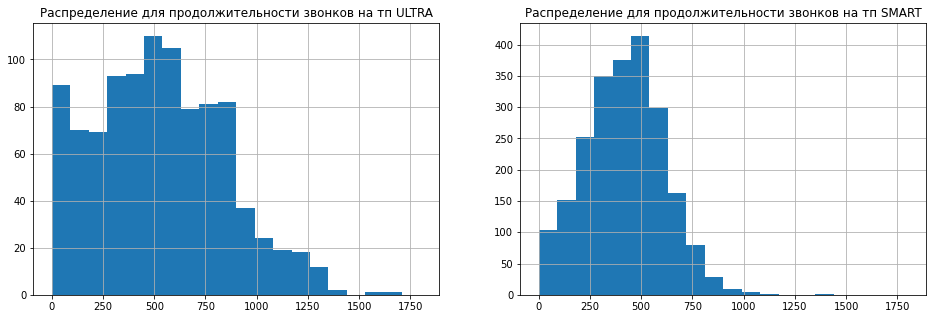

In [41]:
#построим гистограммы распределения для продолжительности звонков
fig, axes = plt.subplots(1,2, figsize=(16,5))

ultra_users['total_duration'].hist(bins=20, range=(0,1800), ax=axes[0])
axes[0].set_title('Распределение для продолжительности звонков на тп ULTRA')

smart_users['total_duration'].hist(bins=20, range=(0,1800), ax=axes[1])
axes[1].set_title('Распределение для продолжительности звонков на тп SMART')

plt.show()

- Дисперсия и стандартное отклонение по продолжительности звонков для `ultra` больше, чем для `smart`. По гистограмме можно увидеть, что данные по длительности звонков больше "размазаны" для тп `ultra`, "хвост" больше растянут. 
- Распределение для тп `smart` ближе к нормальному, а для тп `ultra` скошены вправо. Среднее значение на обоих тп не превышает 500 включенных минут для тп smart. 
____

Посчитаем среднее количество гигабайт, дисперсию и стандартное отклонение для интернет-трафика.

In [42]:
#посчитаем среднее количество, дисперсию и стандартное отклонение для использованного интернет-трафика
report_internet=data_merged.pivot_table(index = 'tariff', values = 'gb_used', aggfunc = ['var', 'std', 'mean']).round(0)
report_internet.columns=['internet_var','std','mean']
report_internet                    

,internet_var,std,mean
tariff,,,
smart,33.0,6.0,16.0
ultra,97.0,10.0,19.0


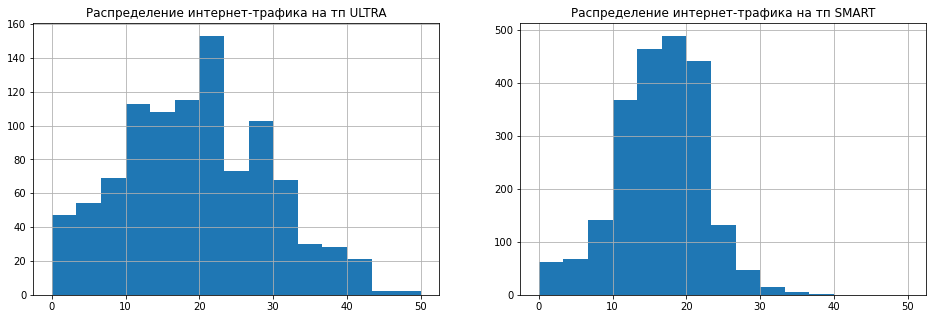

In [43]:
#построим гистограмму распределения для использованного интернет-трафика
fig, axes = plt.subplots(1,2, figsize=(16,5))

ultra_users['gb_used'].hist(bins=15, range=(0,50), ax=axes[0])
axes[0].set_title('Распределение интернет-трафика на тп ULTRA')

smart_users['gb_used'].hist(bins=15, range=(0,50), ax=axes[1])
axes[1].set_title('Распределение интернет-трафика на тп SMART')

plt.show()

- По интернет-трафику данные ближе к нормальному распределению на обоих тарифных планах. Дисперсия и стандартное отклонение также больше для тп `ultra`. 
- Получается, что в среднем на тп `smart` абоненты чаще докупают от 1 гб интернета сверх 15, которые входят в тп. Среднее значение 16гб, а медиана 17 гб.
- На тп `ultra` входит 30 гб, а тратят в среднем 19 гб.

Посчитаем среднее количество sms, дисперсию и стандартное отклонение для сообщений.

In [44]:
#посчитаем среднее количество, дисперсию и стандартное отклонение для сообщений
report_msg=data_merged.pivot_table(index = 'tariff', values ='total_msg', aggfunc = ['var', 'std', 'mean'])
report_msg.columns=['messages_var','std','mean']
report_msg.round(0)         

,messages_var,std,mean
tariff,,,
smart,797.0,28.0,33.0
ultra,2285.0,48.0,49.0


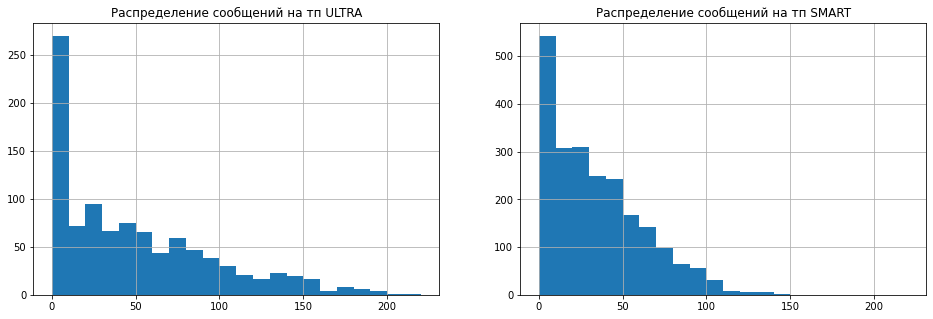

In [45]:
#построим гистограмму распределения для отправленных сообщений
fig, axes = plt.subplots(1,2, figsize=(16,5))

ultra_users['total_msg'].hist(bins=22, range=(0,220), ax=axes[0])
axes[0].set_title('Распределение сообщений на тп ULTRA')

smart_users['total_msg'].hist(bins=22, range=(0,220), ax=axes[1])
axes[1].set_title('Распределение сообщений на тп SMART')
plt.show()

Как видим отправлять сообщения уже было не очень популярно в 2018 году. Посмотрим сколько таких строк в общем количестве, где за месяц 0 отправленных сообщений. Из-за нулевых строк гистограммы не очень наглядны.

In [46]:
msg_no_use_ultra=(len(ultra_users.query('total_msg==0'))/len(ultra_users))
msg_no_use_smart=(len(smart_users.query('total_msg==0'))/len(smart_users))

print('тп ultra {:.2%}'.format(msg_no_use_ultra))
print('тп smart {:.2%}'.format(msg_no_use_smart))

тп ultra 19.37%
тп smart 13.81%


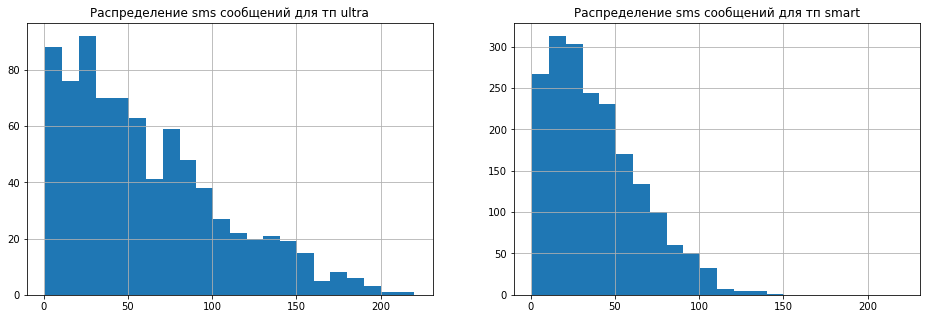

In [47]:
#установим порог более 1 сообщения для наглядности
fig, axes = plt.subplots(1,2, figsize=(16,5))

ultra_users['total_msg'].hist(bins=22, range=(1,220), ax=axes[0])
axes[0].set_title('Распределение sms сообщений для тп ultra')

smart_users['total_msg'].hist(bins=22, range=(1,220), ax=axes[1])
axes[1].set_title('Распределение sms сообщений для тп smart')
plt.show()

- Дисперсия и стандартное отклонение по отправленным сообщениям в месяц больше для тп `ultra`, среднее значение для тп `ultra` равно 49, для тп `smart` - 33. Дисперсия для тп `ultra` снова больше, также как стандартное отклонение.

____
Для нормальных распределений верно правило трёх стандартных отклонений, или правило трёх сигм. Посчитаем сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц? 

In [48]:
#сколько минут достаточно включить в тарифный план, чтобы этого хватило для 99% абонентов тарифного плана ultra и smart
duration_for_ultra = ultra_users['total_duration'].mean()+3*np.std(ultra_users['total_duration'])
duration_for_smart = smart_users['total_duration'].mean()+3*np.std(smart_users['total_duration'])
duration_for_ultra.round(0), duration_for_smart.round(0)

(1479.0, 989.0)

Так, получается для 99% абонентов будет достаточно в месяц минут:
- 1479 минут для тарифного плана `ultra` (включено 3000 минут)
- 989 минут для тарифного плана `smart` (включено 500 минут)

In [49]:
internet_for_ultra=ultra_users['gb_used'].mean()+3*np.std(ultra_users['gb_used'])
internet_for_smart=ultra_users['gb_used'].mean()+3*np.std(smart_users['gb_used'])
internet_for_ultra.round(0), internet_for_smart.round(0)

(49.0, 37.0)

Для 99% абонентов будет достаточно в месяц интернета:
- 49 гб для тарифного плана `ultra` (включено 30)
- 37 гб для тарифного плана `smart` (включено 15)

In [50]:
sms_for_ultra=ultra_users['total_msg'].mean()+3*np.std(ultra_users['total_msg'])
sms_for_smart=ultra_users['total_msg'].mean()+3*np.std(smart_users['total_msg'])
sms_for_ultra.round(0), sms_for_smart.round(0)

(193.0, 134.0)

Для 99% абонентов будет достаточно в месяц sms:
- 193 сообщения для тарифного плана `ultra` (включено 1000)
- 134 сообщения для тарифного плана `smart` (включено 50)

### Вывод
<a id='3.1'></a>

- Максимальная выручка составила - 6770 на тарифном плане `smart`. На тп `ultra` при таком же объеме трафика сумма выручки составила бы 3150 рублей, это меньше на 53%. 
- На тп `ultra` максимальная выручка составила 4800 рублей, при перерасходе интернет трафика на 19 гб.
- Дисперсия и стандартное отклонение по продолжительности звонков для `ultra` больше, чем для `smart`. По гистограмме можно увидеть, что данные по длительности звонков больше "размазаны" для тп `ultra`, "хвост" больше растянут. 
- Распределение продолжительности звонков для тп `smart` ближе к нормальному, а для тп `ultra` скошены вправо, при этом среднее значение на обоих тп не превышает 500 включенных минут для тп smart, то есть в среднем в месяц абоненты обоих тарифов выговаривают не более 500 минут. 
- По интернет-трафику дисперсия и стандартное отклонение также больше для тп `ultra`. В среднем на тп `smart` абоненты чаще докупают от 1 гб и более интернет-трафика сверх 15, которые входят в тп. Среднее значение 16гб, а медиана 17 гб. На тп `ultra` же в среднем тратят 19 гб, а входит 30 гб.
- Дисперсия и стандартное отклонение для сообщений также больше для тп `ultra`. Среднее значение для тп `ultra` равно 49, для тп `smart` - 33. Среднее значение для обоих тп меньше, чем включено в абонентскую плату тп `smart`(50 сообщений). В век интренета сообщения становятся все менее популярны.

При условии, что данные распределены нормально, по правилу трех сигм получается, что:
- на тп `smart` минут входящих для разговора требуется вдвое больше, чем включено в абонентскую плату - 989, а для абонентов тп `ultra` наоборот - достаточно вдвое меньше: 1479. 
-  интернета не хвататет обоим тарифам, так для абонентов тп `ultra` нужно на 19 гб больше -   49 вместо 30, а для абонентов тп `smart` приходится докупать более чем в два раза 37 гб, сверх включенных 15.
- сообщений нужно максимум 134 для тп `smart` и 193 для тп `ultra`.

## Шаг 4 Проверка гипотез и пояснения
<a id='4'></a>

Основная задача проекта заключается в том, чтобы помочь скорректировать рекламный бюджет коммерческого департамента федерального оператора сотовой связи «Мегалайн», а для этого нужно понять, какой тариф приносит больше денег. 

Чтобы приблизиться к принятию окончательного решения в пользу одного из двух тарифных планов нам нужно рассмотреть выручку и проверить гипотезы: 
- средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются;
- средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

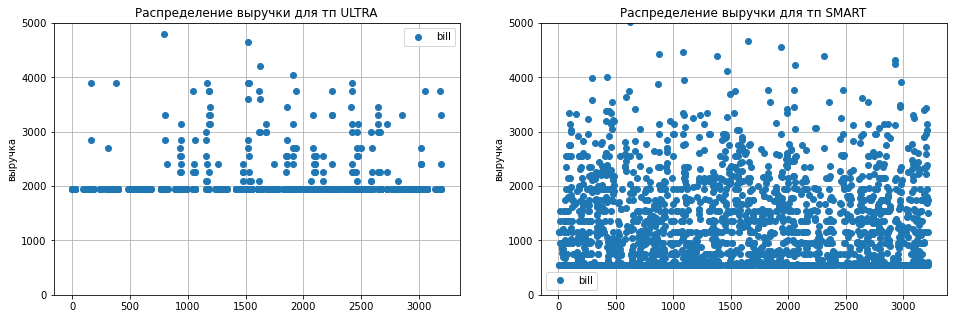

In [51]:
#посмотрим распределение выручки
fig, axes = plt.subplots(1,2, figsize=(16,5))

ultra_users.plot(y='bill', style='o', ylim =(0, 5000), grid=True, alpha=1, ax=axes[0])
axes[0].set_title('Распределение выручки для тп ULTRA')
axes[0].set_ylabel('выручка')

smart_users.plot(y='bill', style='o', ylim =(0, 5000), grid=True, alpha=1, ax=axes[1])
axes[1].set_title('Распределение выручки для тп SMART')
axes[1].set_ylabel('выручка')

plt.show()

По диаграмме рассеивания можно увидеть, что "плотность" значений, сверх включенных в абонентскую плату на тп `smart` сильно больше. На тп `ultra` значения собраны на отметке 1950.

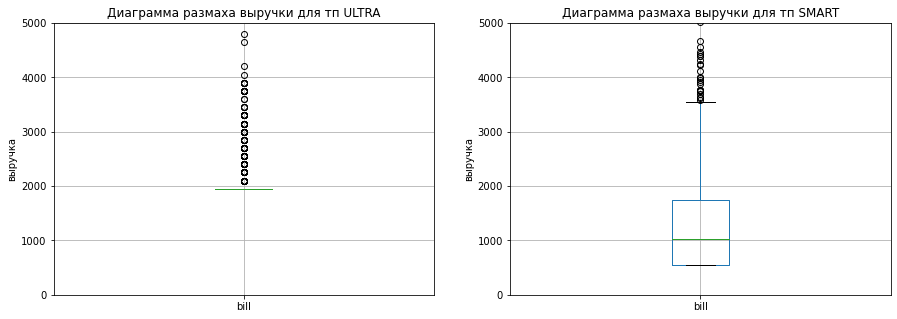

In [52]:
fig, axes = plt.subplots(1,2, figsize=(15,5))

ultra_users.boxplot(column='bill',ax=axes[0])
axes[0].set_ylim(0,5000)
axes[0].set_title('Диаграмма размаха выручки для тп ULTRA')
axes[0].set_ylabel('выручка')

smart_users.boxplot(column='bill',ax=axes[1])
axes[1].set_ylim(0,5000)
axes[1].set_title('Диаграмма размаха выручки для тп SMART')
axes[1].set_ylabel('выручка')

plt.show()

Диаграмма размаха для тп `smart` показывает, что медиана в районе 1000, а выбросы начинаются после 3500. По тп `ultra` диаграмма размаха на показательна, так как значения схлопываются в районе 2000, доля тех, кто выходит за пределы абонентской платы очень мала, а минимальное значение ограничено размером абонентской платы.

In [53]:
ultra_users['bill'].median(), smart_users['bill'].median()

(1950.0, 1021.0)

Предварительно можно сказать, что на тп `ultra` выручка в среднем больше, чем на тп `smart`. Несмотря на то, что абоненты тп `smart` чаще докупают дополнительные пакеты минут, сообщений и интернета, медианная выручка не превышает 1021 рублей, а это почти вдвое меньше абонентской платы за тп `ultra`.

###  Гипотеза 1: 

Средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются.

Нулевая гипотеза всегда формулируется так, чтобы использовать знак равенства. Так как в задании не уточняется в какую сторону (больше или меньше), то будем формулировать двустороннюю гипотезу. 

Получается: 
- H0: средняя выручка пользователей тарифов «Ультра» и «Смарт» равны; 
- H1: средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются.

In [54]:
#зададим переменные для выручки тп Ультра и Смарт 
bill_for_ultra = ultra_users['bill']
bill_for_smart = smart_users['bill']

#зададим критический уровень статистической значимости
alpha = .05

#проверим гипотезу о равенстве средних двух независимых совокупностей
results_for_test_1 = st.ttest_ind(
    bill_for_ultra, 
    bill_for_smart,
    equal_var=False) #Так как размеры выборки отличаются, то мы установили 
#параметр equal_var==False, чтобы тест посчитал дисперсии выборок по отдельности

print('p-значение: ', results_for_test_1.pvalue)

#сравним получившееся p-значение с заданным уровнем статистической значимости:
if results_for_test_1.pvalue < alpha: 
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение:  1.927011394420941e-250
Отвергаем нулевую гипотезу


Вывод: 

- Данные предоставляют достаточное основание — для выбранного уровня значимости — отвергнуть нулевую гипотезу. Значит, можно сделать вывод, что средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются. Даже при более строгом критическом значении статистической значимости — 0.01 — мы бы получили тот же результат: p-value не превышает и этого значения.

### Гипотеза 2:

Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

Нам необходимо сравнить две генеральные совокупности. Гипотеза также двухсторонняя, так как не уточняется в какую сторону (больше или меньше) различие.

Формулируем гипотезу:
- H0: средняя выручка пользователей из Москвы равна выручке пользователей из других регионов;
- H1: средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

In [55]:
#выделим срез выручки для Москвы
bill_moscow_mean=data_merged.loc[data_merged['city'] == 'Москва']['bill']
#выделим срез для других городов
bill_for_other=data_merged.loc[data_merged['city'] != 'Москва']['bill']

#зададим критический уровень статистической значимости
alpha = .05

results = st.ttest_ind(
    bill_for_other,
    bill_moscow_mean,
    equal_var=False)

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу.") 

p-значение:  0.5216952110000278
Не получилось отвергнуть нулевую гипотезу.


Полученное значение `p-value` говорит о том, что вероятность получить такое различие случайно около 52%. Это явно слишком большая вероятность, чтобы делать вывод о значимом различии между средней выручкой для Москвы и выручкой пользователей из других регионов.
При более строгом критическом значении статистической значимости — 0.01 мы бы получили тот же результат, так как `p-value` все еще больше.

### Гипотеза 3:

Для финального вывода не хватает проверки еще одной гипотезы. Для обоих тарифов есть минимальное значение по выручке. В случае с тп `ultra` абоненты редко переплачивают, но в случае с тп `smart` абоненты переплачивают почти всегда. И если взять за желаемый уровень выручки абонентскую плату тп `ultra` и провести t-test, где срез по выручке абонентов тп `smart` сравнивается с желаемым значением равным 1950 рублей, то можно будет сказать насколько высока вероятность получить желаемое значение, тем самым понять в какой тп лучше вкладывать рекламный бюджет.

- Н0:Размер средней выручки для тарифного плана smart равен 1950 рублей
- Н1:Размер средней выручки для тарифного плана smart меньше 1950 рублей

При одностороннем тесте с альтернативной гипотезой «Размер средней выручки для тарифного плана smart меньше, чем 1950 рублей» нулевая гипотеза отвергается, если выполняется два условия:
- наблюдаемое значение меньше предполагаемого;
- разница между этими значениями достаточно велика, вероятность, что она окажется такой случайно, ниже выбранного уровня значимости.

Тест односторонний, поэтому p-value, полученное в результате двустороннего теста, поделим на 2.

In [56]:
interested_value = 1950 #минимальная выручка для ultra

alpha = .01 #критический уровень статистической значимости

results = st.ttest_1samp(
    bill_for_smart, 
    interested_value)

print('p-значение:', results.pvalue/2) #p-value для однотороннего теста)

if (results.pvalue/2 < alpha) and (bill_for_smart.mean() < interested_value):
    print("Отвергаем нулевую гипотезу: выручка значимо меньше 1950 рублей")
else:
    print("Не получилось отвергнуть нулевую гипотезу: выручка достигает желаемых показателей")

p-значение: 2.1353762946519057e-245
Отвергаем нулевую гипотезу: выручка значимо меньше 1950 рублей


Вероятность, что средняя выручка тп `smart` окажется случайно равной 1950 рублей, ниже выбранного уровня значимости. Выручка по тп `ultra` больше.

### Вывод
<a id='4.1'></a>

- Диаграмма рассеивания показала, что "плотность" значений, сверх включенных в абонентскую плату на тп `smart` сильно больше. На тп `ultra` значения собраны на отметке 1950.
- Диаграмма размаха для тп `smart` показала, что медиана в районе 1000, а выбросы начинаются после 3500. По тп `ultra` диаграмма размаха на показательна, так как значения схлопываются в районе 2000, доля тех, кто выходит за пределы абонентской платы очень мала, а минимальное значение ограничено абонентской платой.
- На тп `ultra` выручка в среднем больше, чем на тп `smart`. Несмотря на то, что абоненты тп `smart` чаще докупают дополнительные пакеты минут, сообщений и интернета, выручка не превышает медианного значения равного 1021 рублю, а это почти вдвое меньше абонентской платы за тп `ultra`.
- Гипотезу о том, что средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются мы переформулировали в нулевую гипотезу: средняя выручка пользователей тарифов «Ультра» и «Смарт» равны; альтернативную гипотеза: средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются. T-test показал, что p-value не превышает критического уровня значимости равного .01, то есть вероятность того, что средние выручки одинаковы близка к нулю.
- Гипотезу о том, что средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов мы переформулировали в нулевую гипотезу: средняя выручка пользователей из Москвы равна выручке пользователей из других регионов; альтернативная гипотеза: средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов. В результате не получилось отвергнуть нулевую гипотезу, так как p-value больше критического уровня значимости, равного 5%. 
- Сформулировали дополнительную нулевую гипотезу: размер средней выручки для тарифного плана smart равен 1950 рублей, альтернативную: размер средней выручки для тарифного плана smart меньше 1950 рублей. Вероятность, что средняя выручка тп smart окажется случайно равной 1950 рублей, меньше 1%.

## Шаг 5 Общий вывод
<a id='5'></a>

Мы провели аналитику для компании «Мегалайн» — федерального оператора сотовой связи. Исследовали два тарифных плана: «Смарт» и «Ультра». Нам было необходимо помочь принять решение о том, какой тариф приносит больше денег и скорректировать рекламный бюджет.

Для того, чтобы это выяснить, мы сделали предварительный анализ тарифов на небольшой выборке клиентов. В нашем распоряжении данные 500 пользователей «Мегалайна». Мы выяснили кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Проанализировали поведение клиентов.

Наша выборка состоит из  351 пользователя тарифного плана `smart` и 149 пользователей тарифного плана `ultra`.

**Анализ и описание данных**

- Максимальное количество израсходованных минут: 1673 минуты и 244 сделанных звонков в декабре - это почти вдвое меньше, чем 3000 минут, входящих в тарифный план `ultra`. 
- Максимальное количество отправленных сообщений: 224 сообщения отправлено в декабре, менее 25% от 1000 сообщений, входящих в тарифный план `ultra`.
- Максимальнsq объем израсходованного интернет-трафика по месяцам: 49 гб. израсходавона в октябре - это на 19 гб больше, чем входит в тарифный план `ultra`.
- Максимальная выручка на тарифном плане `smart` составила 6770 рублей, на тарифном плане `ultra` - 4800 рублей.
 
**Анализ поведения клиентов оператора, исходя из выборки**

- 418 минут месяц в среднем необходимо пользователям тарифного плана `smart` и 526 минут пользователям тарифного плана `ultra`. Средняя длительность для обоих тарифных планов не сильно превышает минимальных 500 минут, включенных в тарифный план `smart`.

- 16 гб интернет-трафика в месяц в среднем требуется пользователям тарифного плана `smart`, то есть они почти всегда докупают дополнительно гигабайты, сверх 15, входящих в тарифный план. А пользователям тарифного плана `ultra` в среднем достаточно 19 гб из 30, включенных гигабайт. 

- 33 сообщения в среднем необходмо для пользователей тарифного плана `smart` и 49 сообщений - тарифного плана `ultra`. В обоих случаях это меньше минимальных 50 сообщений, включенных в абонентскую плату тарифного плана `smart`. 

-  Дисперсия и стандартное отклонение по всем трем параметрам больше на тарифном плане `ultra`, то есть данные на тарифном плане `ultra` больше имеют больший разброс относительно среднего. На гистограммах видно, что данные для тарифного плана `smart` распределены нормально, на тифном плане данные имеют положительную скошенность.

**Проверка гипотез**

**Исследовательская гипотеза 1:** "средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются" переформулирована двухстороннюю статистическую гипотезу: 

- Н0: средняя выручка пользователей тарифов «Ультра» и «Смарт» равны; 
- Н1: средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются. 

Данные предоставляют достаточное основание — для выбранного уровня значимости равного 5% — отвергнуть нулевую гипотезу. Значит, можно сделать вывод, что средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются. Даже при более строгом критическом значении статистической значимости — 0.01 — мы бы получили тот же результат: p-value не превышает и этого значения.

**Исследовательская гипотеза 2:** "средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов" переформулирована двухстороннюю статистическую гипотезу: 

- H0: средняя выручка пользователей из Москвы равна выручке пользователей из других регионов;
- H1: средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

Для выбранного уровня значимости равного 5% вероятность получить такое различие случайно около 52%. Это явно слишком большая вероятность, чтобы делать вывод о значимом различии между средней выручкой для Москвы и выручкой пользователей из других регионов. 
Таким образом, мы отвергаем гипотезу о том, что средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

**Исследовательская гипотеза 3:** "cредняя выручка в месяц на тарифном плане "Смарт" меньше, чем абонентская плата на тарифном плане "Ультра""
Переформулирована в одностороннюю статистическую гипотезу:
- Н0:Размер средней выручки для тарифного плана "Смарт" = 1950 рублей
- Н1:Размер средней выручки для тарифного плана "Смарт" < 1950 рублей

Тест показал, что наблюдаемое значение меньше предполагаемого, разница между этими значениями достаточно велика, вероятность, что она окажется такой случайно, ниже выбранного уровня значимости, соответственно мы не можем отвергнуть исследовательскую гипотезу. 

**Итоговый вывод по результатам исследования:** Тарифный план "Ультра" лучше, он приносит больше денег. 

## Чек-лист готовности проекта
<a id='6'></a>
Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод info())
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  заполнены пропущенные значения
- [x]  изменены типы данных
- [x]  данные приведены к нужным типам
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  найдины и исправлены ошибки в данных
- [x]  посчитано для каждого пользователя: количество сделанных звонков и израсходованных минут разговора по месяцам;
- [x]  посчитано для каждого пользователя: количество отправленных сообщений по месяцам;
- [x]  посчитано для каждого пользователя: объем израсходованного интернет-трафика по месяцам;
- [x]  посчитано для каждого пользователя: помесячная выручка с каждого пользователя (вычтите бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика; остаток умножьте на значение из тарифного плана; прибавьте абонентскую плату, соответствующую тарифному плану)
- [x]  выполнено задание: Опишите поведение клиентов оператора, исходя из выборки. Сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц? Посчитайте среднее количество, дисперсию и стандартное отклонение. Постройте гистограммы. Опишите распределения.
- [x]  проверена гипотеза: средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются;
- [x]  проверена гипотеза: средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов (пороговое значение alpha задано самостоятельно) 
- [x]  пояснено: как сформулирована нулевая и альтернативная гипотезы;
- [x]  пояснено: какой критерий использовался для проверки гипотез и почему.
- [x]  в каждом этапе есть выводы
- [x]  есть общий вывод